In [1]:
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import imageio

In [2]:
result_df_dict = {
    'Baseline Model': pd.read_csv('./result-data/baseline-test-result.csv').drop(columns=['Unnamed: 0']),
    'Distil Model': pd.read_csv('./result-data/distil-test-result.csv').drop(columns=['Unnamed: 0']),
    'Tiny Distil Model': pd.read_csv('./result-data/tiny_distil-test-result.csv').drop(columns=['Unnamed: 0']),
}

In [3]:
result_df_dict['Baseline Model'].describe()

,BLEU-2,ROUGE-2 F1
count,3892.000000,3892.000000
mean,0.795085,0.546008
std,0.263650,0.440902
min,0.000000,0.000000
25%,0.668036,0.000000
50%,0.903602,0.636364
75%,1.000000,1.000000
max,1.000000,1.000000


In [4]:
result_df_dict['Distil Model'].describe()

,BLEU-2,ROUGE-2 F1
count,3920.000000,3920.000000
mean,0.795173,0.561246
std,0.265283,0.438740
min,0.000000,0.000000
25%,0.668740,0.000000
50%,0.903602,0.666667
75%,1.000000,1.000000
max,1.000000,1.000000


In [5]:
result_df_dict['Tiny Distil Model'].describe()

,BLEU-2,ROUGE-2 F1
count,3901.000000,3901.000000
mean,0.794838,0.551442
std,0.260777,0.434480
min,0.000000,0.000000
25%,0.668740,0.000000
50%,0.897115,0.615385
75%,1.000000,1.000000
max,1.000000,1.000000


In [6]:
bleu_df = pd.concat([
    result_df_dict[name]['BLEU-2'].rename(name) for name in result_df_dict.keys()
], axis=1)
rouge_df = pd.concat([
    result_df_dict[name]['ROUGE-2 F1'].rename(name) for name in result_df_dict.keys()
], axis=1)

score_df_dict = {
    'BLEU-2': bleu_df,
    'ROUGE-2 F1': rouge_df
}

In [7]:
bleu_df.describe()

,Baseline Model,Distil Model,Tiny Distil Model
count,3892.000000,3920.000000,3901.000000
mean,0.795085,0.795173,0.794838
std,0.263650,0.265283,0.260777
min,0.000000,0.000000,0.000000
25%,0.668036,0.668740,0.668740
50%,0.903602,0.903602,0.897115
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


In [8]:
rouge_df.describe()

,Baseline Model,Distil Model,Tiny Distil Model
count,3892.000000,3920.000000,3901.000000
mean,0.546008,0.561246,0.551442
std,0.440902,0.438740,0.434480
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.636364,0.666667,0.615385
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


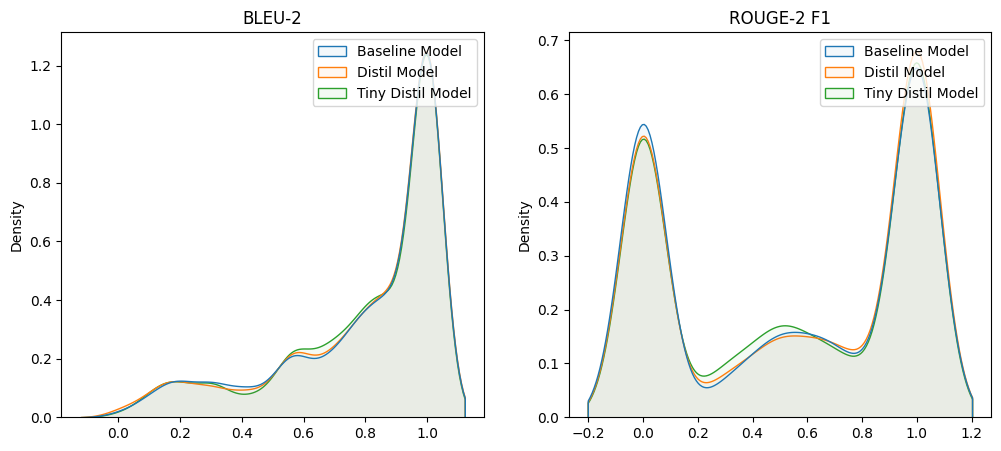

In [9]:
fig, ax = plt.subplots(figsize=(12, 5), ncols=2, nrows=1)
for i, (name, score_df) in enumerate(score_df_dict.items()):
    sns.kdeplot(data=score_df,
                fill=True,
                alpha=0.05,
                common_grid=True,
                ax=ax[i]
                )
    ax[i].set_title(name)

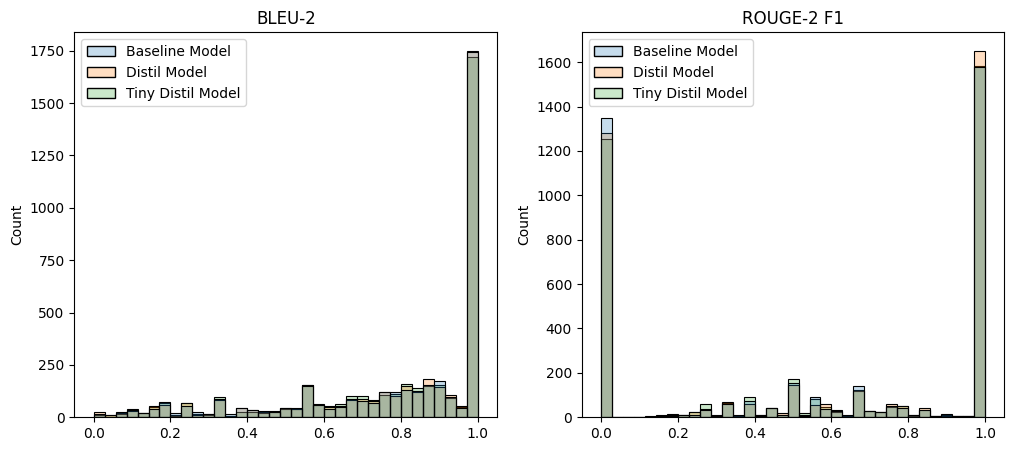

In [10]:
fig, ax = plt.subplots(figsize=(12, 5), ncols=2, nrows=1)
for i, (name, score_df) in enumerate(score_df_dict.items()):
    sns.histplot(data=score_df,
                 bins=35,
                 fill=True,
                 alpha=0.25,
                 ax=ax[i]
                )
    ax[i].set_title(name)

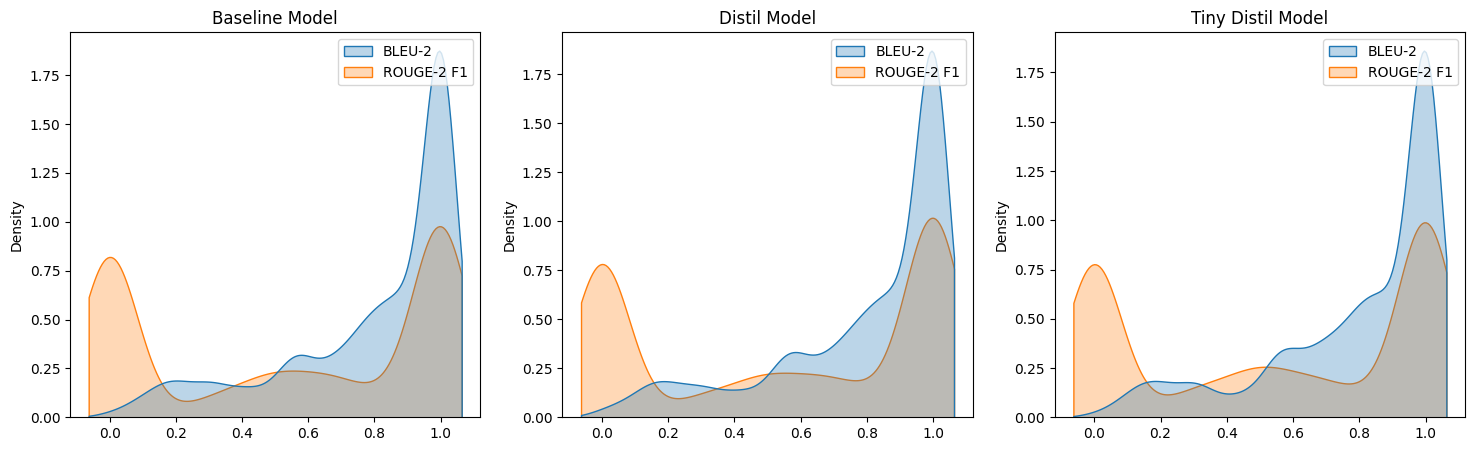

In [11]:
fig, ax = plt.subplots(figsize=(18, 5), ncols=3, nrows=1)
for i, (name, result_df) in enumerate(result_df_dict.items()):
    sns.kdeplot(data=result_df, 
                fill=True, 
                alpha=0.3,
                common_grid=True, 
                cut=1, 
                ax=ax[i],
                )
    ax[i].set_title(name)

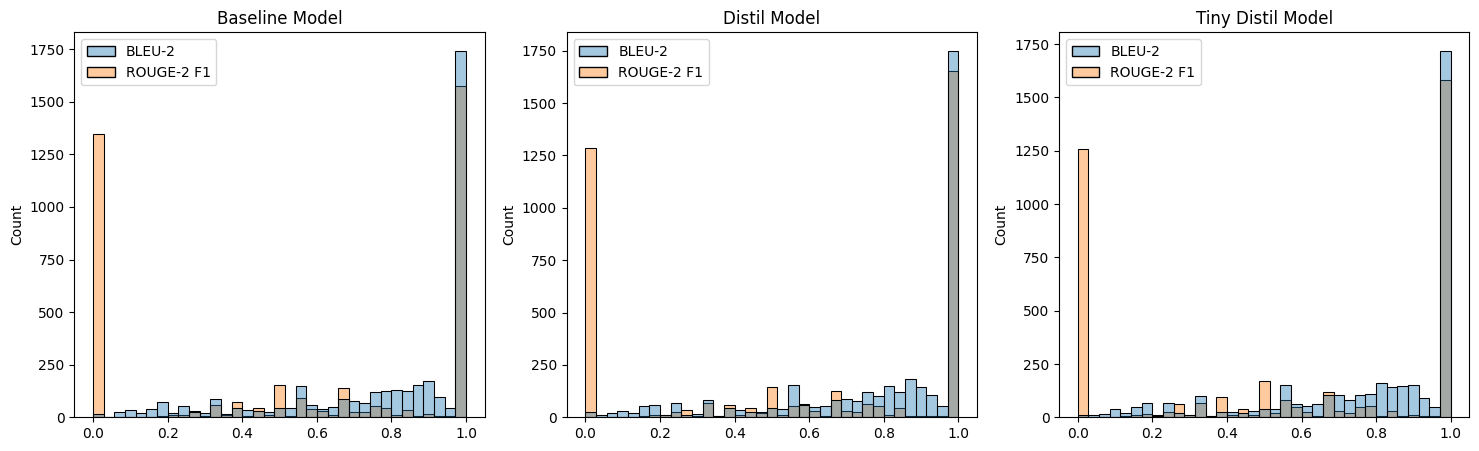

In [12]:
fig, ax = plt.subplots(figsize=(18, 5), ncols=3, nrows=1)
for i, (name, result_df) in enumerate(result_df_dict.items()):
    sns.histplot(data=result_df,
                 bins=35,
                 ax=ax[i],
                 alpha=0.4
                 )
    
    ax[i].set_title(name)

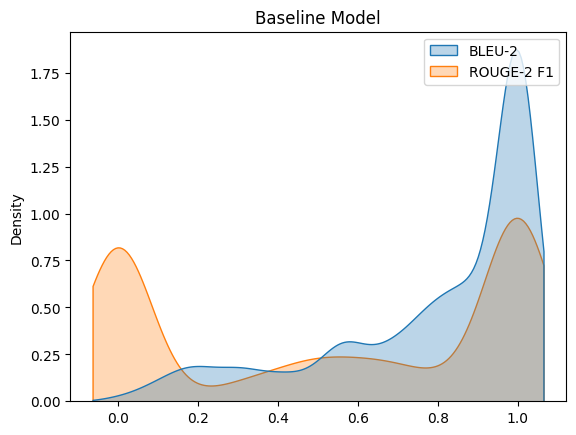

In [13]:
name = 'Baseline Model'
ax = sns.kdeplot(data=result_df_dict[name], 
                 fill=True, 
                 alpha=0.3,
                 common_grid=True, 
                 cut=1, 
                 )

_ = ax.set_title(name)

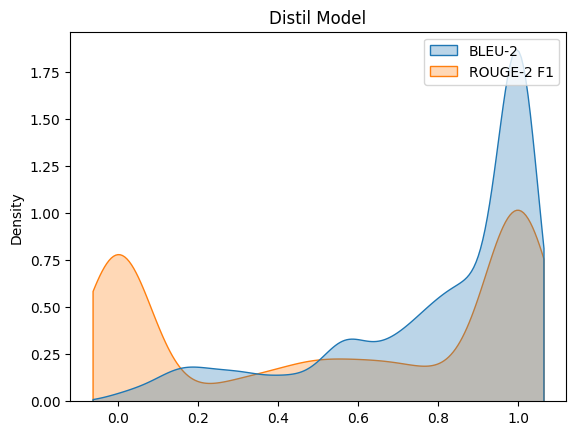

In [14]:
name = 'Distil Model'
ax = sns.kdeplot(data=result_df_dict[name], 
                 fill=True, 
                 alpha=0.3,
                 common_grid=True, 
                 cut=1, 
                 )

_ = ax.set_title(name)

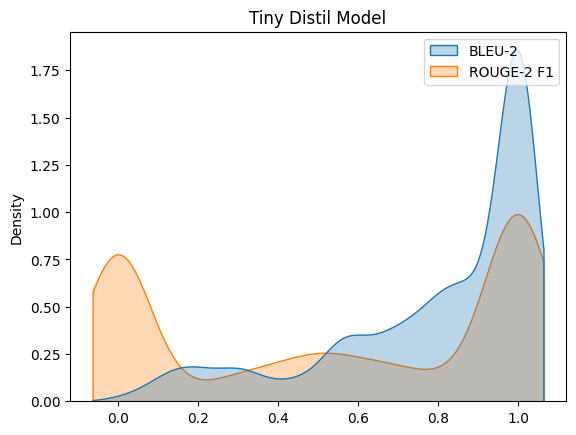

In [15]:
name = 'Tiny Distil Model'
ax = sns.kdeplot(data=result_df_dict[name], 
                 fill=True, 
                 alpha=0.3,
                 common_grid=True, 
                 cut=1, 
                 )

_ = ax.set_title(name)

In [16]:
image_files = [
    './assets/baseline-score.png',
    './assets/distil-score.png',
    './assets/tiny-distil-score.png'
]
images = []

for file in image_files:
    images.append(imageio.imread(file))
imageio.mimsave('./assets/score-differences.gif', images, duration=1, loop=0)

/tmp/ipykernel_4409/3813593469.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(file))
